In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from PIL import Image
import h5py
import pickle

#Glasses classification
# Read dataset
path = 'Picture.h5'
file = h5py.File(path,'r+')

In [2]:
print(file.keys())

<KeysViewHDF5 ['dataset', 'label']>


In [3]:
X_data = np.array(file["/dataset"]).astype("uint8")
y_data = np.array(file["/label"]).astype("uint8")
file.close()

In [4]:
y = np.ravel(y_data)

In [5]:
y.shape

(341,)

In [7]:
#split the training set and testing set
from sklearn.model_selection import train_test_split
# use 40% of testing
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.4,
                                                   random_state=42)

In [8]:
# Train data
print(X_train.shape)
print(y_train.shape)

# Test data
print(X_test.shape)
print(y_test.shape)

(204, 80000)
(204,)
(137, 80000)
(137,)


In [9]:
# Use LDA for dimensionality reduction
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
lda.fit(X_train,y_train)

LinearDiscriminantAnalysis(n_components=2)

In [10]:
# Transform the training data and test data
X_train = lda.transform(X_train)
X_test = lda.transform(X_test)

In [15]:
# Use SVM model do training and prediction
from sklearn import svm
from sklearn.metrics import accuracy_score

# Create SVM classifier
clf = svm.SVC(kernel='linear', C=15, gamma="scale" , probability=True)

# Train the model using training set
model = clf.fit(X_train, y_train)

# Make Predict for the testing set.
svm_pred = clf.predict(X_test)
print("Testing Accuracy: ", accuracy_score(y_test,svm_pred))


Testing Accuracy:  0.8613138686131386


In [16]:
# save the model into img_model.p
pickle.dump(model,open('model_SVM.p','wb'))
print("Pickle is dumped successfully")

Pickle is dumped successfully


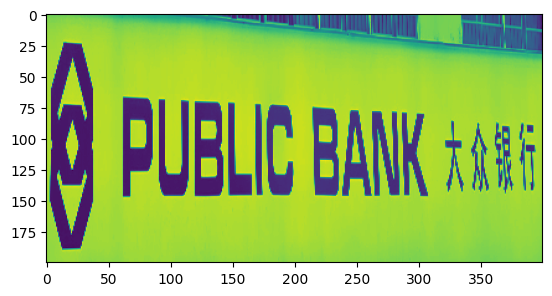

In [18]:
import cv2 as cv
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
img_path='All_images/3_100.jpg'
img=cv.imread(img_path)

img_resized = cv.resize(img, (400, 200))
img_gray = cv.cvtColor(img_resized, cv.COLOR_BGR2GRAY)
l=img_gray.flatten().reshape(1,-1)

plt.imshow(img_gray)

In [19]:
l = lda.transform(l)

In [20]:
probability=clf.predict_proba(l)
Categories=['BSN','Maybank','Public Bank']

probability

array([[0.04520034, 0.03824666, 0.91655299]])

In [21]:
store_max=[]
for ind,val in enumerate(Categories):
  print(f'{val} = {probability[0][ind]*100}%')
  store_max.append(probability[0][ind]*100)
    

store_max

BSN = 4.520034265817268%
Maybank = 3.8246664567597692%
Public Bank = 91.65529927742297%


[4.520034265817268, 3.8246664567597692, 91.65529927742297]

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, svm_pred, labels=clf.classes_.tolist()))

              precision    recall  f1-score   support

           1       0.79      0.96      0.87        56
           2       0.85      0.66      0.74        35
           3       0.98      0.89      0.93        46

    accuracy                           0.86       137
   macro avg       0.87      0.84      0.85       137
weighted avg       0.87      0.86      0.86       137



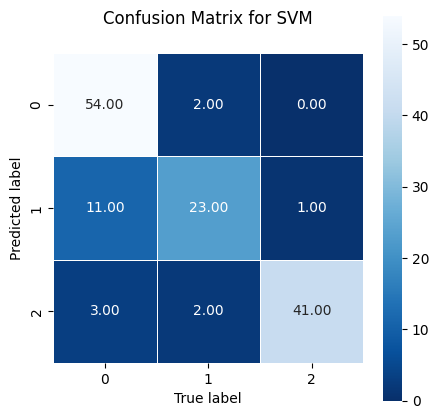

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, svm_pred)


plt.figure(figsize= (5,5))

sns.heatmap(cm, annot=True, fmt='.2f',
           linewidth=0.5, square=True, cmap='Blues_r')

plt.title("Confusion Matrix for SVM\n")
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.show()

# K-NN

In [27]:
#split the training set and testing set
from sklearn.model_selection import train_test_split
# use 40% of testing
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.4,
                                                   random_state=42)

In [28]:
# create LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2) # refer to the n-1 formula, n is the number of classes
lda.fit(X_train, y_train.ravel())
X_train_lda = lda.transform(X_train)
X_test_lda = lda.transform(X_test)

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=5)
model = knn.fit(X_train_lda, y_train)

knn_pred = knn.predict(X_test_lda)

print("Accuracy : ", accuracy_score(y_test,knn_pred))

Accuracy :  0.8467153284671532


In [30]:
# save the model into img_model.p
pickle.dump(model,open('model_KNN.p','wb'))
print("Pickle is dumped successfully")

Pickle is dumped successfully


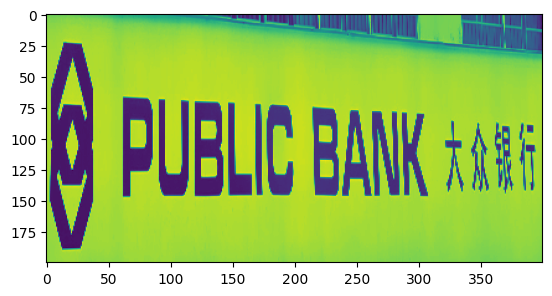

In [31]:
import cv2 as cv
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
img_path='All_images/3_100.jpg'
img=cv.imread(img_path)

img_resized = cv.resize(img, (400, 200))
img_gray = cv.cvtColor(img_resized, cv.COLOR_BGR2GRAY)
l=img_gray.flatten().reshape(1,-1)

plt.imshow(img_gray)

In [32]:
test11 = lda.transform(l)
probabi=knn.predict_proba(test11)
Categories=['BSN','Maybank','Public Bank']

probabi

array([[0., 0., 1.]])

In [33]:
store_max=[]
for ind,val in enumerate(Categories):
  print(f'{val} = {probabi[0][ind]*100}%')
  store_max.append(probabi[0][ind]*100)
    

store_max

BSN = 0.0%
Maybank = 0.0%
Public Bank = 100.0%


[0.0, 0.0, 100.0]

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, knn_pred, labels=knn.classes_.tolist()))

              precision    recall  f1-score   support

           1       0.79      0.96      0.87        56
           2       0.80      0.57      0.67        35
           3       0.95      0.91      0.93        46

    accuracy                           0.85       137
   macro avg       0.85      0.82      0.82       137
weighted avg       0.85      0.85      0.84       137



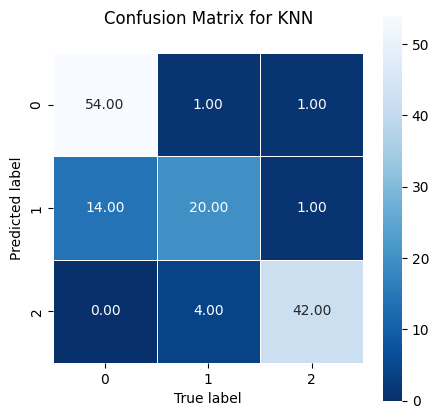

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, knn_pred)


plt.figure(figsize= (5,5))

sns.heatmap(cm, annot=True, fmt='.2f',
           linewidth=0.5, square=True, cmap='Blues_r')

plt.title("Confusion Matrix for KNN\n")
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.show()

# MLP

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.4,
                                                   random_state=42)

In [37]:
# Train data
print(X_train.shape)
print(y_train.shape)

# Test data
print(X_test.shape)
print(y_test.shape)

(204, 80000)
(204,)
(137, 80000)
(137,)


In [38]:
# Use LDA for dimensionality reduction
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)

lda.fit(X_train,y_train)
# Transform the training data and test data
X_train_lda = lda.transform(X_train)
X_test_lda = lda.transform(X_test)

In [39]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes = (10), max_iter = 1000)

model = mlp.fit(X_train_lda, y_train)


mlp_pred = mlp.predict(X_test_lda)
print("Testing Accuracy:", accuracy_score(y_test, mlp_pred))

Testing Accuracy: 0.8686131386861314


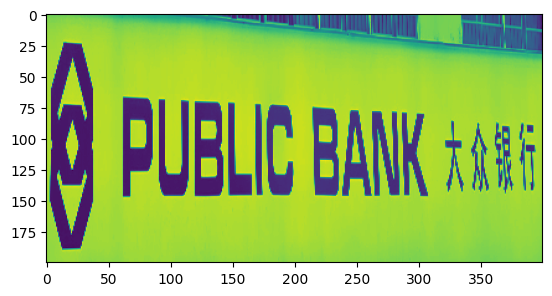

In [40]:
import cv2 as cv
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
img_path='All_images/3_100.jpg'
img=cv.imread(img_path)

img_resized = cv.resize(img, (400, 200))
img_gray = cv.cvtColor(img_resized, cv.COLOR_BGR2GRAY)
l=img_gray.flatten().reshape(1,-1)

plt.imshow(img_gray)

In [41]:
test11 = lda.transform(l)
probabi=mlp.predict_proba(test11)
Categories=['BSN','Maybank','Public Bank']

probabi

array([[0.00655541, 0.02328862, 0.97015598]])

In [42]:
store_max=[]
for ind,val in enumerate(Categories):
  print(f'{val} = {probabi[0][ind]*100}%')
  store_max.append(probabi[0][ind]*100)
    

store_max

BSN = 0.6555405913123907%
Maybank = 2.3288616775392996%
Public Bank = 97.01559773114832%


[0.6555405913123907, 2.3288616775392996, 97.01559773114832]

In [43]:
# save the model into img_model.p
pickle.dump(model,open('model_MLP.p','wb'))
print("Pickle is dumped successfully")

Pickle is dumped successfully


In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test, mlp_pred, labels=mlp.classes_.tolist()))

              precision    recall  f1-score   support

           1       0.80      0.98      0.88        56
           2       0.91      0.57      0.70        35
           3       0.96      0.96      0.96        46

    accuracy                           0.87       137
   macro avg       0.89      0.84      0.85       137
weighted avg       0.88      0.87      0.86       137



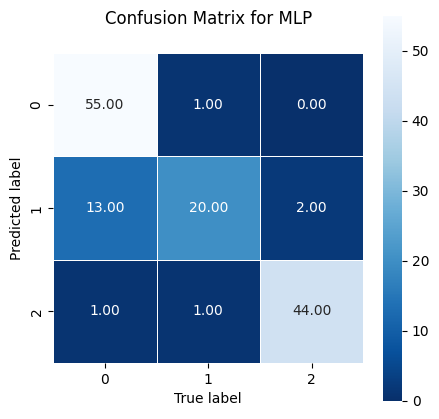

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, mlp_pred)


plt.figure(figsize= (5,5))

sns.heatmap(cm, annot=True, fmt='.2f',
           linewidth=0.5, square=True, cmap='Blues_r')

plt.title("Confusion Matrix for MLP\n")
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.show()